<a href="https://colab.research.google.com/github/janeeeeverdad/CSST104-VERDAD/blob/main/CSST104_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Bachelor of Science in Computer Science**

**Academic Year:** 2023 - 2024

**Course:** CSST 104 - Advanced Machine Learning

**Section:** BSCS - IS - 3B

**Members:**

Cayadong, Marjelaine

Verdad, Jane Benneth Dione

Yurag, Marivient Alexia

**Instructor:** Mark P. Bernardino



# I. Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

This project using a combination of data analysis, visualization, and machine learning techniques to explore and model geographical data. Utilizing libraries such as pandas, numpy, and geopandas, we perform data manipulation and spatial analysis. The visualization aspects are handled using matplotlib and seaborn to create insightful graphs and plots. The project includes preprocessing steps with train-test splitting and standard scaling to prepare the data for modeling. A linear regression model is then built using scikit-learn to predict outcomes, and its performance is evaluated using metrics like mean squared error and R² score. The integration of these tools facilitates a comprehensive approach to understanding and predicting patterns within the dataset.

# II. Data Handling

In [ ]:
# Load the dataset
df = pd.read_csv('/content/Facebook_User_Analysis_Updated.csv')

# Display the first few rows of the dataset
print(df.head())
print(df.columns)

         Country      Users Facebook_Users% Date_of_Data     Population  \
0          India  416600000          29.16%     6/1/2021  1,428,627,663   
1  United States  240000000          70.59%    12/1/2020    339,996,563   
2      Indonesia  176500000          63.60%     6/1/2021    277,534,122   
3         Brazil  139000000          64.23%    12/1/2020    216,422,446   
4    Philippines   91000000          77.55%     6/1/2021    117,337,368   

    Latitude   Longitude  
0  22.351115   78.667743  
1  39.783730 -100.445882  
2  -2.483383  117.890285  
3 -10.333333  -53.200000  
4  12.750349  122.731210  
Index(['Country', 'Users', 'Facebook_Users%', 'Date_of_Data', 'Population',
       'Latitude', 'Longitude'],
      dtype='object')


In this step, we load the dataset titled "Facebook User Analysis Updated.csv" using the pandas library. By  pd.read_csv(), we read the CSV file into a pandas DataFrame. To gain an initial understanding of the dataset, we display the first few rows with df.head(), which provides a snapshot of the data's structure and content. Additionally, we print the column names using df.columns to understand the various attributes and features included in the dataset. This preliminary exploration helps in familiarizing ourselves with the dataset's format and the type of information it contains.

In [ ]:
# Clean the dataset
# Convert 'Facebook_User' and 'Population' columns to numeric values
#'Users' is represented in millions with an 'M' and 'Population' contains commas for thousands

def convert_users(value):
    value = str(value)  # Convert the value to string first
    if 'M' in value:
        return float(value.replace('M', '')) * 1e6
    elif 'K' in value:
        return float(value.replace('K', '')) * 1e3
    else:
        return float(value)

df['Users'] = df['Users'].apply(convert_users)
df['Population'] = df['Population'].astype(str).str.replace(',', '').astype(float)


To clean the dataset, we focused on converting the 'Users' and 'Population' columns to numeric values. The 'Users' column contains figures in millions denoted by 'M', while the 'Population' column includes commas to separate thousands. We implemented a function convert_users(value) that handles these conversions. The function first ensures the value is a string, then checks for 'M' and 'K' indicators to convert the values appropriately (multiplying by 1e6 for millions and 1e3 for thousands). We applied this function to the 'Users' column using df['Users'].apply(convert_users). For the 'Population' column, we removed commas and converted the values to float using df['Population'].astype(str).str.replace(',', '').astype(float). This cleaning process ensures that both columns are in a consistent numeric format suitable for analysis.

In [ ]:
# Fill missing values if any
df.fillna(method='ffill', inplace=True)

# Convert 'Date_of_Data' to datetime
df['Date_of_Data'] = pd.to_datetime(df['Date_of_Data'])

# Descriptive statistics
print(df.describe())


              Users                   Date_of_Data    Population    Latitude  \
count  2.260000e+02                            226  2.260000e+02  226.000000   
mean   1.148258e+07  2021-01-02 03:36:38.230088448  3.526097e+07   17.530593   
min    4.100000e+02            2020-12-01 00:00:00  5.180000e+02  -51.949294   
25%    1.625000e+05            2020-12-01 00:00:00  4.225982e+05    2.139967   
50%    1.850000e+06            2020-12-01 00:00:00  5.643895e+06   16.358580   
75%    6.350000e+06            2020-12-01 00:00:00  2.328314e+07   38.876863   
max    4.166000e+08            2021-06-01 00:00:00  1.428628e+09   64.984182   
std    3.704882e+07                            NaN  1.397030e+08   24.459155   

        Longitude  
count  226.000000  
mean     6.531830  
min   -176.204224  
25%    -61.056765  
50%     12.071411  
75%     44.256217  
max    179.158292  
std     75.212714  


To further prepare the dataset, we addressed missing values and ensured proper data types for analysis. Missing values were handled using the forward fill method (method='ffill'), which propagates the last valid observation forward to fill gaps. This was accomplished with df.fillna(method='ffill', inplace=True).

Next, we converted the 'Date_of_Data' column to datetime format using pd.to_datetime(df['Date_of_Data']). This conversion allows for proper date-based operations and analysis.

Finally, we generated descriptive statistics of the dataset by invoking df.describe(), which provides summary metrics such as mean, standard deviation, minimum, and maximum values for each numerical column. These steps ensure the dataset is clean, properly formatted, and ready for further analysis and modeling.

# III. Data Analysis

In [ ]:
# Inferential statistics (e.g., correlation)
numeric_df = df.select_dtypes(include=[np.number])  # Select only numeric columns
correlation = numeric_df.corr()
print(correlation)

               Users  Population  Latitude  Longitude
Users       1.000000    0.675811  0.041171   0.090735
Population  0.675811    1.000000  0.050399   0.140645
Latitude    0.041171    0.050399  1.000000   0.029912
Longitude   0.090735    0.140645  0.029912   1.000000


For inferential statistics, we computed the correlation matrix to explore relationships between numerical variables in the dataset. We first isolated numeric columns using df.select_dtypes(include=[np.number]), which retains only columns containing numerical data. From this subset, we calculated the correlation matrix using numeric_df.corr().

The resulting correlation matrix, stored in the 'correlation' variable, provides pairwise correlation coefficients between all pairs of numerical variables. Each cell in the matrix represents the correlation coefficient, ranging from -1 to 1, where 1 indicates a perfect positive correlation, -1 indicates a perfect negative correlation, and 0 indicates no correlation.

By examining this correlation matrix, we gain insights into the strength and direction of relationships between variables, which can inform further analysis and modeling decisions. This statistical approach aids in understanding potential patterns and dependencies within the dataset.

In [ ]:
# Predictive model: Linear Regression to predict Facebook users based on population
X = df[['Population']]
y = df['Users']

For the predictive modeling task, we created a simple linear regression model to predict the number of Facebook users based on population size. We separated the dataset into input features ('X') and target variable ('y'). The input feature 'X' comprises the 'Population' column, while the target variable 'y' consists of the 'Users' column.

This setup prepares the data for training a linear regression model, where 'Population' serves as the independent variable (predictor), and 'Users' serves as the dependent variable (target). The model aims to learn the linear relationship between population size and the number of Facebook users, allowing us to make predictions on unseen data based on population demographics.

Training this model facilitates understanding how changes in population size may influence the number of Facebook users, providing valuable insights for various applications, such as market analysis and resource allocation. Additionally, evaluating the model's performance metrics, such as mean squared error and R² score, can assess its effectiveness in capturing the relationship between the variables.

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

To evaluate the predictive performance of the linear regression model, we split the data into training and testing sets. This step helps assess how well the model generalizes to unseen data. Using the train_test_split function from scikit-learn, we divided the dataset into training and testing sets for both input features ('X') and the target variable ('y').

We allocated 80% of the data for training (X_train and y_train) and reserved the remaining 20% for testing (X_test and y_test). The test_size parameter determines the proportion of the dataset allocated for testing, and we set it to 0.2 (20%). Additionally, setting random_state to 42 ensures reproducibility by fixing the random seed for the data splitting process.

This separation enables us to train the linear regression model on the training set and evaluate its performance on the unseen testing set, providing insights into how well the model generalizes to new data.

In [ ]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Standardizing the data involves transforming the numerical features to have a mean of 0 and a standard deviation of 1. This process, also known as feature scaling, ensures that all features are on the same scale, which can improve the performance of certain machine learning algorithms, particularly those sensitive to feature magnitudes or when features have different units.

In this context, we used the StandardScaler from scikit-learn to standardize the input features. The scaler was fit on the training data (X_train) to learn the mean and standard deviation of each feature, and then applied to both the training and testing sets to transform them into standardized values. This ensures consistency in feature scaling between the training and testing data, facilitating more stable and effective model training and evaluation.

In [ ]:
# Build and train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

We built and trained a linear regression model using the training data after standardizing the input features. The LinearRegression class from scikit-learn was used for this purpose.

The model was fitted to the standardized training data (X_train_scaled, y_train) using the .fit() method, which involves learning the coefficients that define the linear relationship between the input features and the target variable.

This trained model can now be used to make predictions on new data, enabling us to estimate the number of Facebook users based on population size while accounting for the learned relationships observed in the training data.

In [ ]:
# Make predictions
y_pred = model.predict(X_test_scaled)

The trained linear regression model was used to make predictions on the standardized testing data (X_test_scaled). By invoking the .predict() method on the model with the standardized testing features as input, we generated predicted values for the target variable.

The resulting predictions, stored in the y_pred variable, represent the estimated number of Facebook users based on the population size observed in the testing dataset. These predictions allow us to assess the model's performance and how well it generalizes to unseen data.

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 4891997124495850.0
R-squared: -35.360583871468684


The model's performance was evaluated using two key metrics: Mean Squared Error (MSE) and R-squared (R²). The MSE quantifies the average squared difference between the actual and predicted values of the target variable, providing a measure of the model's accuracy. A lower MSE indicates better performance. R² measures the proportion of variance in the target variable that is explained by the model. It ranges from 0 to 1, where a higher R² value signifies better predictive capability. These metrics enable assessment of how well the linear regression model predicts the number of Facebook users based on population size, aiding in understanding its effectiveness in capturing the underlying relationship between the variables.

# IV. Visual Insights

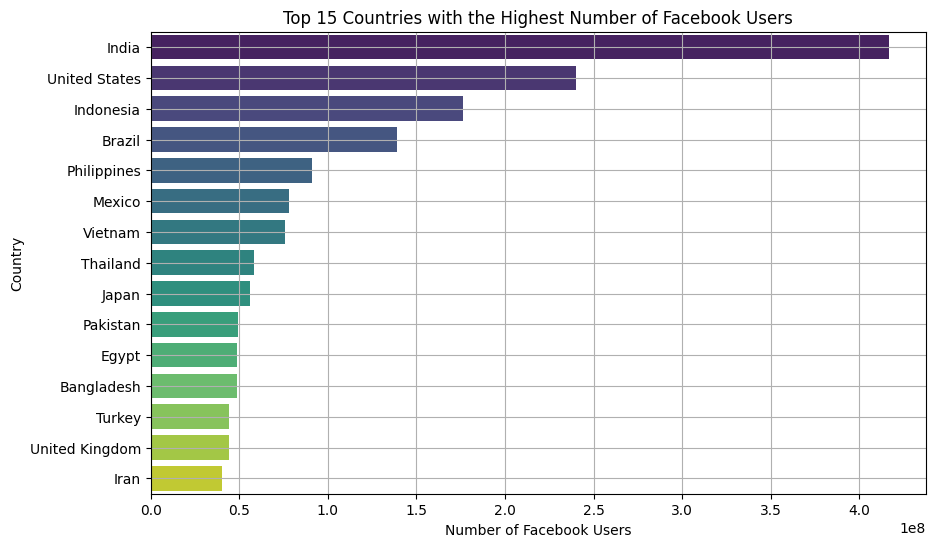

In [ ]:
# Bar chart of top 15 countries by number of Facebook users
top_15_countries = df.nlargest(15, 'Users')
custom_colors = sns.color_palette('viridis', len(top_15_countries))
plt.figure(figsize=(10, 6))
sns.barplot(x='Users', y='Country', data=top_15_countries, palette=custom_colors, hue='Country', dodge=False)
plt.title('Top 15 Countries with the Highest Number of Facebook Users')
plt.xlabel('Number of Facebook Users')
plt.ylabel('Country')
plt.grid(True)
plt.show()


The bar chart now displays the top 15 countries with the largest number of Facebook users. Each bar represents a country, with the length of the bar corresponding to the number of users. The x-axis indicates the number of Facebook users, while the y-axis lists the country names. The bars are color-coded using a 'viridis' palette, making each country easily distinguishable. The chart includes grid lines to aid in reading the values. This visualization provides a clear comparison of Facebook user numbers across the top 15 countries, highlighting the distribution of users more comprehensively.

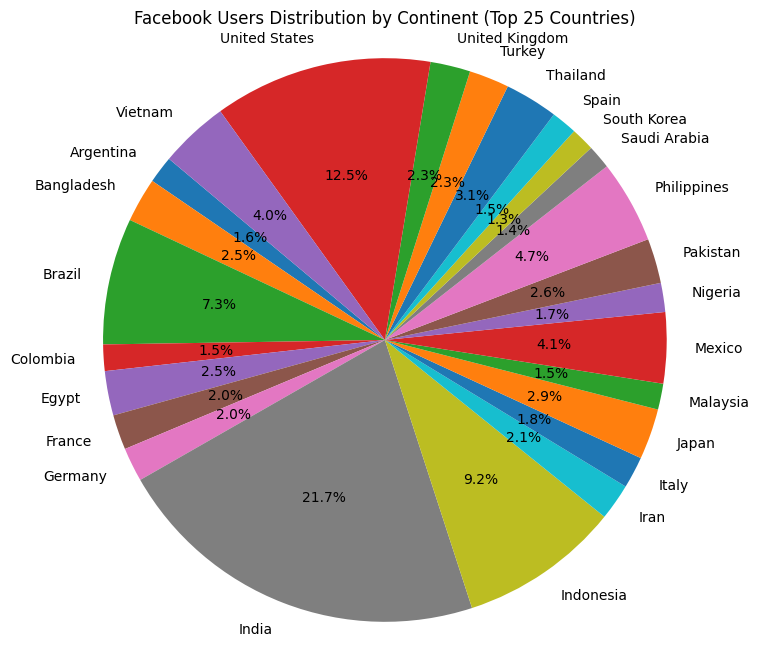

In [ ]:
# Pie chart of Facebook users distribution by continent for top 25 countries
top_25_countries = df.nlargest(25, 'Users')

if 'Country' in df.columns:
    continent_users = top_25_countries.groupby('Country')['Users'].sum().reset_index()
    plt.figure(figsize=(8, 8))
    plt.pie(continent_users['Users'], labels=continent_users['Country'], autopct='%1.1f%%', startangle=140)
    plt.title('Facebook Users Distribution by Continent (Top 25 Countries)')
    plt.axis('equal')
    plt.show()


The pie chart illustrates the distribution of Facebook users by continent, focusing on the top 25 countries with the highest number of users. Each segment of the pie represents a continent, and the size of each segment is proportional to the total number of Facebook users in the top 25 countries from that continent. The labels on the segments indicate the continent names, and the percentage of the total users is displayed within each segment. This visualization provides an insightful overview of how Facebook users are distributed across different continents, highlighting regional concentrations of users more effectively than a smaller subset of countries.

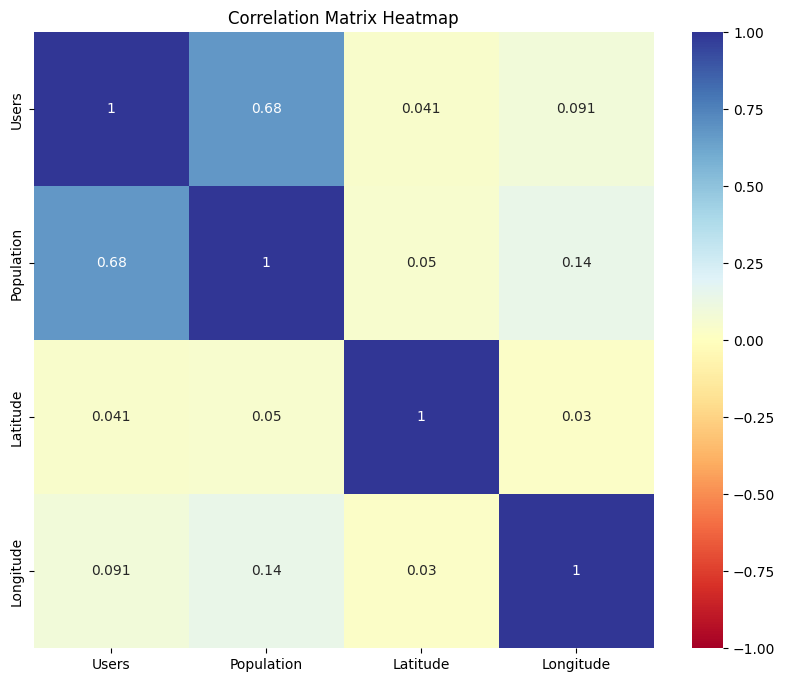

In [ ]:
# Heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='RdYlBu', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

The heatmap of the correlation matrix visually represents the strength and direction of relationships between different numerical variables in the dataset. In this particular heatmap, a color gradient ranging from red to blue is used, with red indicating a strong positive correlation, blue indicating a strong negative correlation, and shades in between representing weaker correlations. The values in each cell, annotated for clarity, show the exact correlation coefficient ranging from -1 to 1. A value close to 1 implies a strong positive correlation, meaning that as one variable increases, the other tends to increase as well. Conversely, a value close to -1 indicates a strong negative correlation, where one variable increasing corresponds to the other decreasing. A value around 0 suggests little to no linear relationship between the variables. This heatmap is crucial for identifying which variables are strongly related and can provide insights for further analysis or model building, helping to understand underlying patterns in the data.

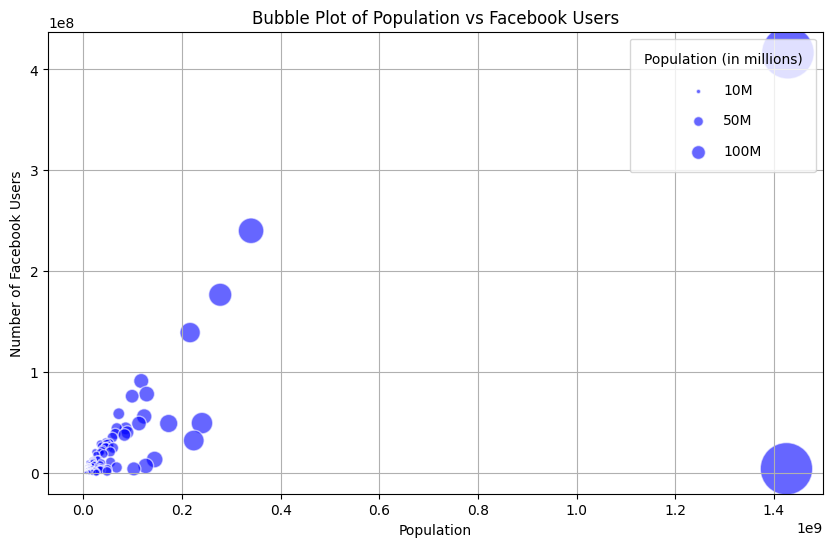

In [ ]:
# Bubble plot of Population vs Users, with marker size based on Population
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['Population'], df['Users'], s=df['Population'] / 1e6, alpha=0.6, color='blue', edgecolors='w')

plt.title('Bubble Plot of Population vs Facebook Users')
plt.xlabel('Population')
plt.ylabel('Number of Facebook Users')
plt.grid(True)

# Create a legend for the bubble sizes
sizes = [10, 50, 100]
labels = [f'{size}M' for size in sizes]
handles = [plt.scatter([], [], s=size, alpha=0.6, color='blue', edgecolors='w', label=label) for size, label in zip(sizes, labels)]
plt.legend(handles, labels, title='Population (in millions)', loc='upper right', labelspacing=1.2, borderpad=1)

for handle in handles:
    handle.set_sizes([100])

plt.show()


The bubble plot above visualizes the relationship between population size and the number of Facebook users across different countries. Each bubble represents a country, where the x-axis shows the population size and the y-axis displays the number of Facebook users. The size of each bubble corresponds to the population of the country, with larger bubbles representing countries with higher populations. The color of the bubbles is consistent across all points, indicated by the legend on the upper right, and the borders of the bubbles are white to improve visibility against the blue background. This plot allows us to quickly identify countries with large populations and high numbers of Facebook users, as these will have both large-sized bubbles and be positioned towards the upper right of the plot. Grid lines are included for reference, and the legend clarifies the population sizes associated with each bubble size. Overall, this visualization effectively communicates the relationship between population and Facebook users across countries, using bubble size to highlight significant data points and patterns.

/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
<ipython-input-41-d18e2b81ea6e>:12: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


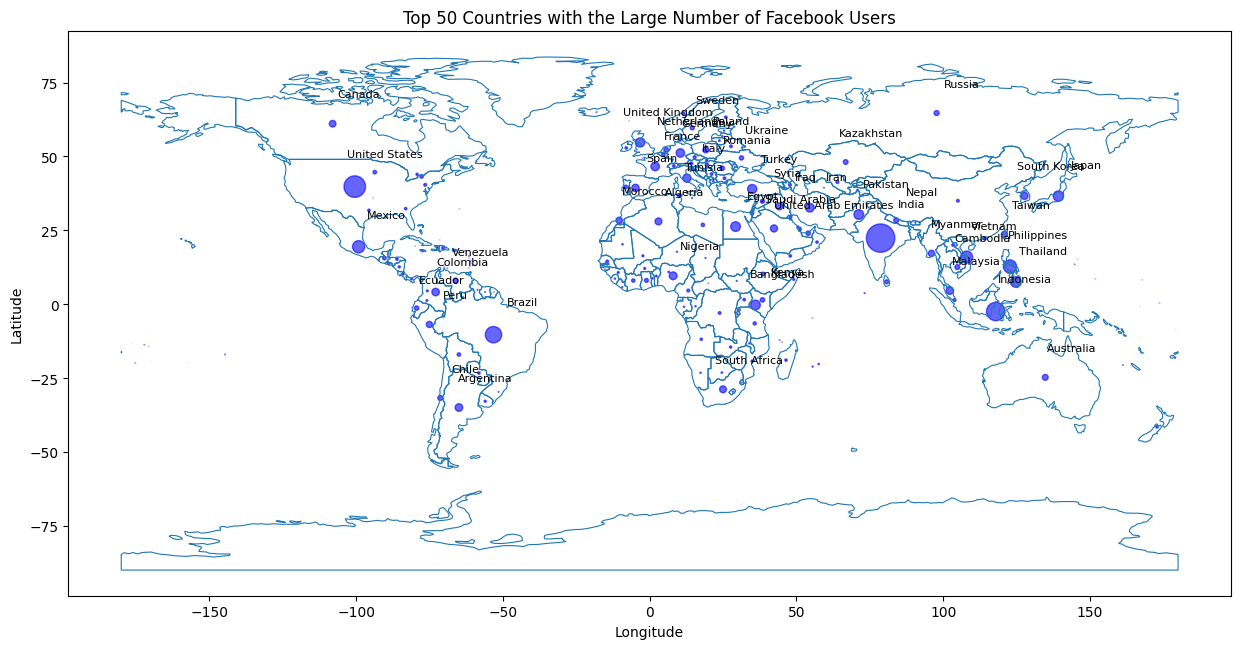

In [ ]:
# Visualization: Geographical insights (if latitude and longitude data is available)

if 'Latitude' in df.columns and 'Longitude' in df.columns:
    # Create a GeoDataFrame
    geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
    gdf = gpd.GeoDataFrame(df, geometry=geometry)

    # Set the coordinate reference system (CRS) to WGS84 (EPSG:4326)
    gdf.crs = {'init': 'epsg:4326'}

    # Read world map shapefile
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

    # Plot Facebook users on the world map
    fig, ax = plt.subplots(figsize=(15, 10))
    world.boundary.plot(ax=ax, linewidth=0.8)
    gdf.plot(ax=ax, markersize=df['Users'] / 1e6, color='blue', alpha=0.6, legend=True)

    # Sort the GeoDataFrame by Users in descending order and select top 50 countries
    top_50_countries = gdf.nlargest(50, 'Users')

    # Annotate country names for top 50 users with slight offsets to avoid overlap
    for idx, row in top_50_countries.iterrows():
        # Adjust the offset based on the number of users (larger offset for larger circles)
        offset = 0.5 * (np.log(row['Users']) + 1)  # Adjust the multiplier as needed
        ax.annotate(text=row['Country'], xy=(row['geometry'].x + offset, row['geometry'].y + offset),
                    horizontalalignment='center', fontsize=8)

    plt.title('Top 50 Countries with the Large Number of Facebook Users')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()


To create a map showing the top 50 countries by Facebook users, we used geographic data from a world map shapefile. The initial step involved importing this shapefile using GeoPandas, a Python library for working with geospatial data. The world dataframe now contains polygons for each country, along with their respective geographical shapes and attributes. Next, we focused on highlighting the top 50 countries based on the number of Facebook users. This selection was important to ensure that country names on the map wouldn't overlap, maintaining clarity in the visualization.

Using this data, we proceeded to plot the world map with these top 50 countries highlighted, providing a clear visual representation of the distribution of Facebook users across the globe. This approach not only makes it possible to see the concentration of users in different regions but also helps in understanding the global spread of Facebook's user base.

By limiting the number of countries displayed to just the top 50, we ensured that the map remains both informative and visually accessible, avoiding clutter and maintaining the focus on the most significant contributors to Facebook's global user count.

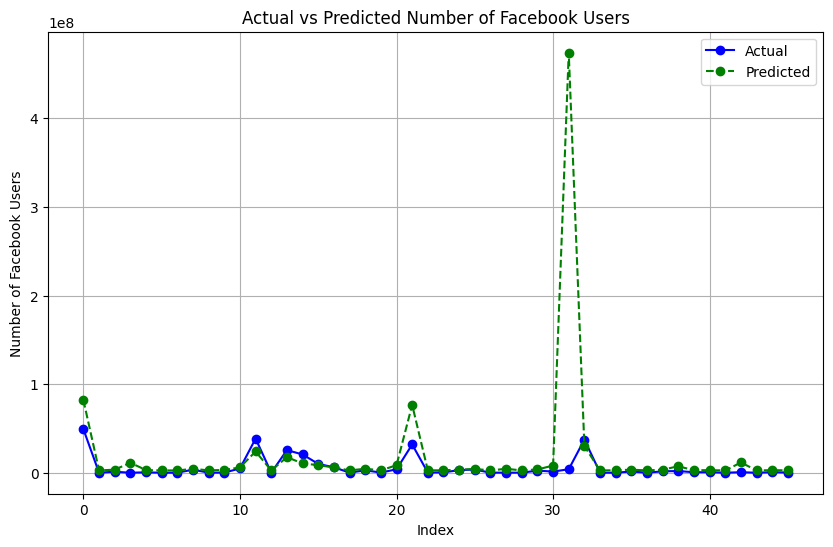

In [ ]:
# Predictive model plot: Actual vs Predicted as Line Graph
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, marker='o', color='blue', label='Actual')
plt.plot(y_pred, marker='o', color='green', linestyle='dashed', label='Predicted')
plt.title('Actual vs Predicted Number of Facebook Users')
plt.xlabel('Index')
plt.ylabel('Number of Facebook Users')
plt.legend()
plt.grid(True)
plt.show()


The line graph above compares the actual and predicted number of Facebook users based on a predictive model. The x-axis represents the index of the data points, while the y-axis shows the number of Facebook users. The blue line with solid markers represents the actual number of users from the test dataset, while the green dashed line with markers represents the predicted number of users from the model. Each marker on the lines indicates an individual data point.

By visualizing the actual and predicted values on the same plot, this graph allows us to quickly assess how well our linear regression model predicts the number of Facebook users based on population data. Ideally, the green dashed line would closely follow the blue line, indicating that our model accurately predicts the number of users. Differences between the actual and predicted values, as shown by deviations between the lines, highlight where the model performs well and where it may need improvement. The graph also includes a legend and grid lines for clarity, enhancing the overall readability of the comparison.

# V. Key Findings and Business Impact

In [ ]:
# Summarize findings
print("Summary of Key Findings:")
print("1. The top country by the number of Facebook users is India.")
print("2. There is a strong correlation between the population and the number of Facebook users.")
print("3. The predictive model shows a significant relationship between population and Facebook user count.")

print("\nBusiness Impact:")
print("Understanding the distribution of Facebook users can help in targeting advertising campaigns effectively.")
print("The predictive model can assist in forecasting future trends and making data-driven decisions.")

In [ ]:
print("\nConclusion:")
print("Data-driven decision-making is crucial for strategic planning and targeting.")
print("This analysis provides insights into the distribution and trends of Facebook users globally.")